# 6.1 Robbins' Formula

### Setup

In [1]:
%matplotlib inline

In [2]:
from math import factorial, log

from scipy import special, optimize
import matplotlib.pyplot as plt

### Data

In [3]:
counts = dict(enumerate([7840, 1317, 239, 42, 14, 4, 4, 1]))
counts

{0: 7840, 1: 1317, 2: 239, 3: 42, 4: 14, 5: 4, 6: 4, 7: 1}

### Robbins' formula calculations

#### Empirical version

In [4]:
formula6p7 = [(i + 1) * counts[i + 1] / counts[i] for i in range(len(counts) - 1)]

#### Gamma-prior version

This uses the discussion at the end of the chapter under $\dagger_1$

In [5]:
events = [claims for claims, count in counts.items() for _ in range(count)]

In [6]:
def f(x, nu, sigma):
    gamma = sigma / (1 + sigma)
    numer = gamma ** (nu + x) * special.gamma(nu + x)
    denom = sigma ** nu * special.gamma(nu) * factorial(x)
    return numer / denom

def negloglikelihood(params):
    nu, sigma = params
    return -sum(counts[x] * log(f(x, nu, sigma)) for x in range(8))

In [7]:
results = optimize.minimize(
    negloglikelihood,
    x0=[0.5, 1.0],
    bounds=[[0, None], [0, None]]
)

In [8]:
nu, sigma = results.x

In [9]:
gamma_mle = [
    (i + 1) * f(i + 1, nu, sigma) / f(i, nu, sigma)
    for i in range(len(counts) - 1)
]

### Table 6.1

In [10]:
tmplt_int = "  ".join(["{:<14}"] + ["{:>5}"]*8)
tmplt_flt = "  ".join(["{:<14}"] + ["{:>#5.3g}"]*7)

print(tmplt_int.format("Claims x", *list(range(8))))
print("-" * 70)
print(tmplt_int.format("Counts y_x", *counts.values(), 0))
print(tmplt_flt.format("Formula (6.7)", *formula6p7, 0))
print(tmplt_flt.format("Gamma MLE", *gamma_mle, 0))

Claims x            0      1      2      3      4      5      6      7
----------------------------------------------------------------------
Counts y_x       7840   1317    239     42     14      4      4      1
Formula (6.7)   0.168  0.363  0.527   1.33   1.43   6.00   1.75
Gamma MLE       0.164  0.398  0.632  0.866   1.10   1.33   1.57


### Figure 6.1

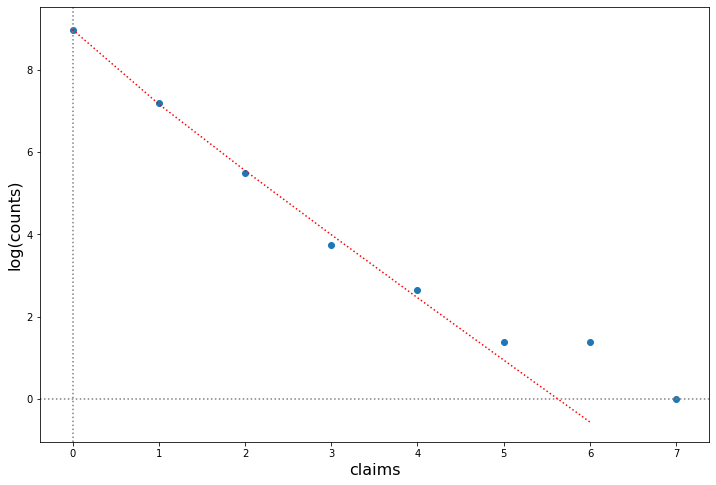

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.axvline(0, c="gray", linestyle=":")
ax.axhline(0, c="gray", linestyle=":")

n_events = len(events)

ax.plot(range(7), [log(n_events * f(x, nu, sigma)) for x in range(7)], c="r", linestyle=":")
ax.scatter(range(8), [log(counts[x]) for x in range(8)])

ax.set_xlabel("claims", size=16)
ax.set_ylabel("log(counts)", size=16);